In [1]:
import sys
import json
from pathlib import Path
from torchvision import datasets

In [2]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

In [3]:
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

from utils.utils import set_seed

set_seed()

from models.effnetb0 import init_model_effnetb0
from methods.sisa.sisa_utils import create_sisa_structure
from methods.sisa.sisa_utils import recreate_sisa_dataloaders
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure

Device used: cuda


In [4]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 3
SHARDS = 3
SLICES = 5

In [5]:
*_, transform = init_model_effnetb0()

Init model...
Done initializing model.
Model ID: 2056889954896, Optimizer ID: 2055523807872, Criterion ID: 2056220573808


In [6]:
data_root = project_root / "data"
train_dataset = datasets.ImageFolder(root=data_root / "afhq/train", transform=transform)
test_dataset = datasets.ImageFolder(root=data_root / "afhq/val", transform=transform)

In [7]:
results_path = Path("D:/Unlearning/results/animal_faces/sisa")
sisa_structure_file = results_path / "sisa_structure.json"
save_models_metrics_dir = results_path / "sisa_models"

In [8]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1,
)

In [9]:
sisa_test(
    dataloaders=dataloaders,
    saved_models_metrics_dir=save_models_metrics_dir,
    init_model_func=init_model_effnetb0,
    clear_solo_models_preds=True,
    results_path=results_path,
)

Init model...
Done initializing model.
Model ID: 2056221503072, Optimizer ID: 2056220389680, Criterion ID: 2056220391216
Loading and testing model: D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_0_EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_0_final_model.pth: 100%|██████████| 24/24 [00:09<00:00,  2.44it/s]


Predictions and labels saved to D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_0_EffNetB0_AFHQ_predictions.json
Init model...
Done initializing model.
Model ID: 2056221703904, Optimizer ID: 2056221502928, Criterion ID: 2056221503120
Loading and testing model: D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_1_EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_1_final_model.pth: 100%|██████████| 24/24 [00:10<00:00,  2.38it/s]


Predictions and labels saved to D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_1_EffNetB0_AFHQ_predictions.json
Init model...
Done initializing model.
Model ID: 2056220570960, Optimizer ID: 2056220571104, Criterion ID: 2056220571440
Loading and testing model: D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_2_EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_2_final_model.pth: 100%|██████████| 24/24 [00:10<00:00,  2.29it/s]

Predictions and labels saved to D:\Unlearning\results\animal_faces\sisa\sisa_models/shard_2_EffNetB0_AFHQ_predictions.json
Evaluation results saved to D:\Unlearning\results\animal_faces\sisa\sisa_final_evaluation.json


In [10]:
with open(results_path / "sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9913
  Precision: 0.9914
  Recall: 0.9913
  F1 Score: 0.9913
Shard shard_1 Metrics:
  Accuracy: 0.9947
  Precision: 0.9947
  Recall: 0.9947
  F1 Score: 0.9947
Shard shard_2 Metrics:
  Accuracy: 0.9900
  Precision: 0.9901
  Recall: 0.9900
  F1 Score: 0.9900

Aggregated Model Metrics:
  Accuracy: 0.9960
  Precision: 0.9960
  Recall: 0.9960
  F1 Score: 0.9960


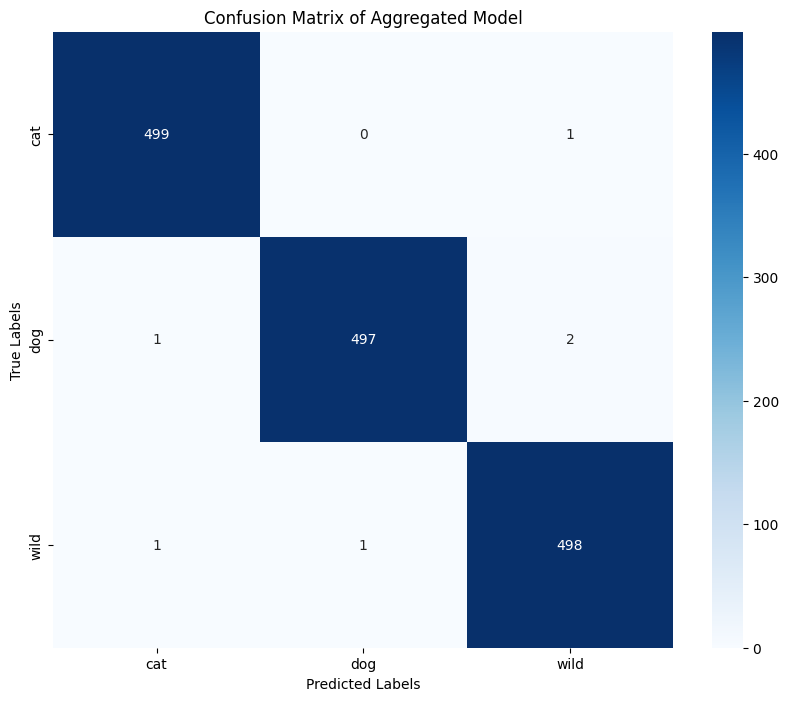

In [11]:
evaluate_aggregated_model(results, classes)

# SISA unlearning results

In [12]:
samples_to_delete = (
    project_root / "results/animal_faces/naive/afhq_samples_to_unlearn_30per.json"
)
sisa_structure = results_path / "sisa_structure.json"
updated_sisa_structure = results_path / "updated_sisa_strucute.json"
deleted_samples = results_path / "deleted_samples.json"

In [13]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1,
)

In [14]:
save_path = results_path / "sisa_updated_models"

In [15]:
sisa_test(
    dataloaders=dataloaders,
    saved_models_metrics_dir=save_path,
    init_model_func=init_model_effnetb0,
    clear_solo_models_preds=True,
)

Init model...
Done initializing model.
Model ID: 2056221504272, Optimizer ID: 2056221504464, Criterion ID: 2056221504176
Loading and testing model: D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_0_EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 24/24 [00:09<00:00,  2.56it/s]


Predictions and labels saved to D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_0_EffNetB0_AFHQ_predictions.json
Init model...
Done initializing model.
Model ID: 2056323897696, Optimizer ID: 2056323895392, Criterion ID: 2056323897600
Loading and testing model: D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_1_EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 24/24 [00:09<00:00,  2.46it/s]


Predictions and labels saved to D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_1_EffNetB0_AFHQ_predictions.json
Init model...
Done initializing model.
Model ID: 2056221505472, Optimizer ID: 2056221505424, Criterion ID: 2056221504032
Loading and testing model: D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_2_EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 24/24 [00:09<00:00,  2.49it/s]

Predictions and labels saved to D:\Unlearning\results\animal_faces\sisa\sisa_updated_models/shard_2_EffNetB0_AFHQ_predictions.json
Evaluation results saved to sisa_final_evaluation.json


In [16]:
with open(results_path / "sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9913
  Precision: 0.9914
  Recall: 0.9913
  F1 Score: 0.9913
Shard shard_1 Metrics:
  Accuracy: 0.9947
  Precision: 0.9947
  Recall: 0.9947
  F1 Score: 0.9947
Shard shard_2 Metrics:
  Accuracy: 0.9900
  Precision: 0.9901
  Recall: 0.9900
  F1 Score: 0.9900

Aggregated Model Metrics:
  Accuracy: 0.9960
  Precision: 0.9960
  Recall: 0.9960
  F1 Score: 0.9960


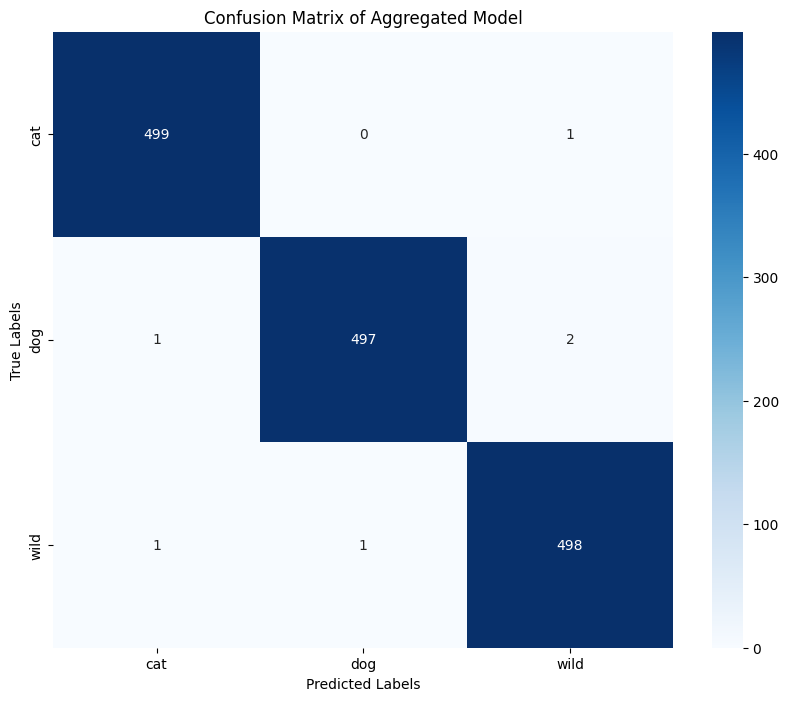

In [17]:
evaluate_aggregated_model(results, classes)